In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel,ttest_1samp,ttest_ind
from scipy.stats import binom,t,norm
from scipy.stats import f,f_oneway,kruskal,ttest_ind,levene,shapiro

In [4]:
#downloading the csv file
!gdown 1EQ-4PSjLmeb-N-pxIvFMM_1u-bFfCNrm

Downloading...
From: https://drive.google.com/uc?id=1EQ-4PSjLmeb-N-pxIvFMM_1u-bFfCNrm
To: /content/Business Case Yulu - Hypothesis Testing.csv
100% 648k/648k [00:00<00:00, 91.0MB/s]


In [5]:
df=pd.read_csv("Business Case Yulu - Hypothesis Testing.csv")
df


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
# Summary of columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
"""
Datatype of following attributes needs to change to proper data type
-datetime - to datetime
-season - to categorical
- holiday - to categorical
-workingday - to categorical
- weather - to categorical

"""

df['datetime'] = pd.to_datetime(df['datetime'])
df["season"] = df['season'].astype('object')
df["holiday"] = df['holiday'].astype('object')
df["workingday"] = df['workingday'].astype('object')
df["weather"] = df['weather'].astype('object')



In [7]:
# Checking the Null Value

df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
# Describing All the Columns

df.iloc[:,1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [9]:
# Getting the date range for the data set

print(f"Data Set is from : {df['datetime'].min()} -{df['datetime'].max()}")

Data Set is from : 2011-01-01 00:00:00 -2012-12-19 23:00:00


In [10]:
# Let's Check the Count of Bicycles Season wise
# season: season (1: spring, 2: summer, 3: fall, 4: winter)
seasonal_count = df.groupby('season')[['count']].count()
seasonal_count

,count
season,
1,2686
2,2733
3,2733
4,2734


In [11]:
#workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
workink_day_count = df.groupby('workingday')[['count']].count()
workink_day_count

,count
workingday,
0,3474
1,7412


In [13]:
"""
weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
"""

weather_count = df.groupby('weather')[['count']].count()
weather_count

,count
weather,
1,7192
2,2834
3,859
4,1


In [14]:
holiday_versus_nonholiday_count = df.groupby('holiday')[['count']].count()
holiday_versus_nonholiday_count

,count
holiday,
0,10575
1,311


<Axes: xlabel='temp', ylabel='Count'>

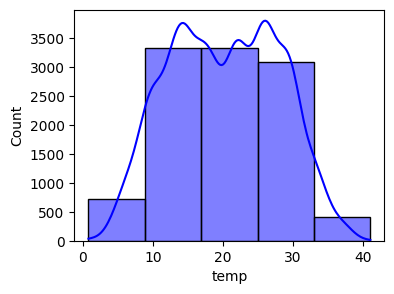

In [15]:
# Univariate Analysis:

#Let's see the distribution of Measure Values like temp,atemp,etc

plt.figure(figsize=(4, 3))
sns.histplot(df['temp'], bins=5, kde=True, color='blue')


<Axes: xlabel='atemp', ylabel='Count'>

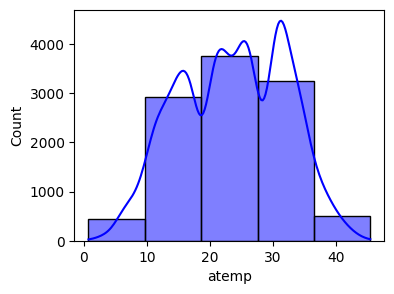

In [ ]:

plt.figure(figsize=(4, 3))
sns.histplot(df['atemp'], bins=5, kde=True, color='blue')

<Axes: xlabel='humidity', ylabel='Count'>

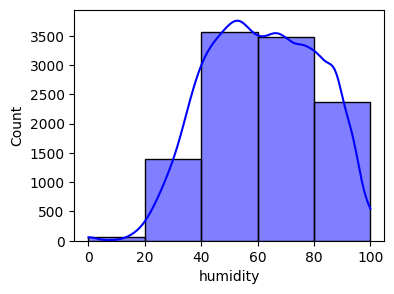

In [ ]:

plt.figure(figsize=(4, 3))
sns.histplot(df['humidity'], bins=5, kde=True, color='blue')

<Axes: xlabel='windspeed', ylabel='Count'>

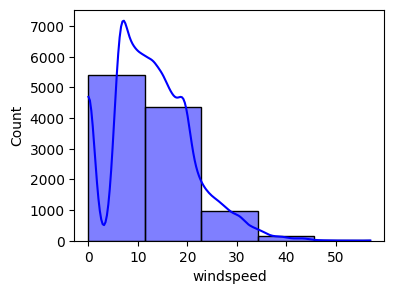

In [ ]:

plt.figure(figsize=(4, 3))
sns.histplot(df['windspeed'], bins=5, kde=True, color='blue')

<Axes: xlabel='casual', ylabel='Count'>

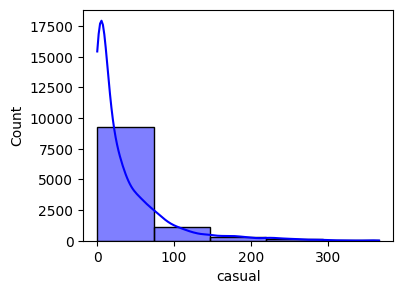

In [ ]:

plt.figure(figsize=(4, 3))
sns.histplot(df['casual'], bins=5, kde=True, color='blue')

<Axes: xlabel='registered', ylabel='Count'>

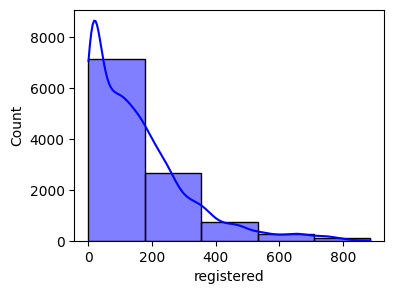

In [ ]:

plt.figure(figsize=(4, 3))
sns.histplot(df['registered'], bins=5, kde=True, color='blue')

<Axes: xlabel='count', ylabel='Count'>

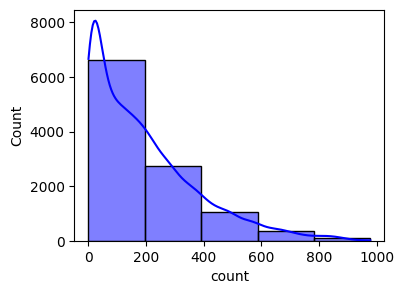

In [ ]:

plt.figure(figsize=(4, 3))
sns.histplot(df['count'], bins=5, kde=True, color='blue')

In [ ]:
"""
Concept Used:

1. Bi-Variate Analysis
2.Hypothesis testing
t-test
ANNOVA
Chi-square

"""

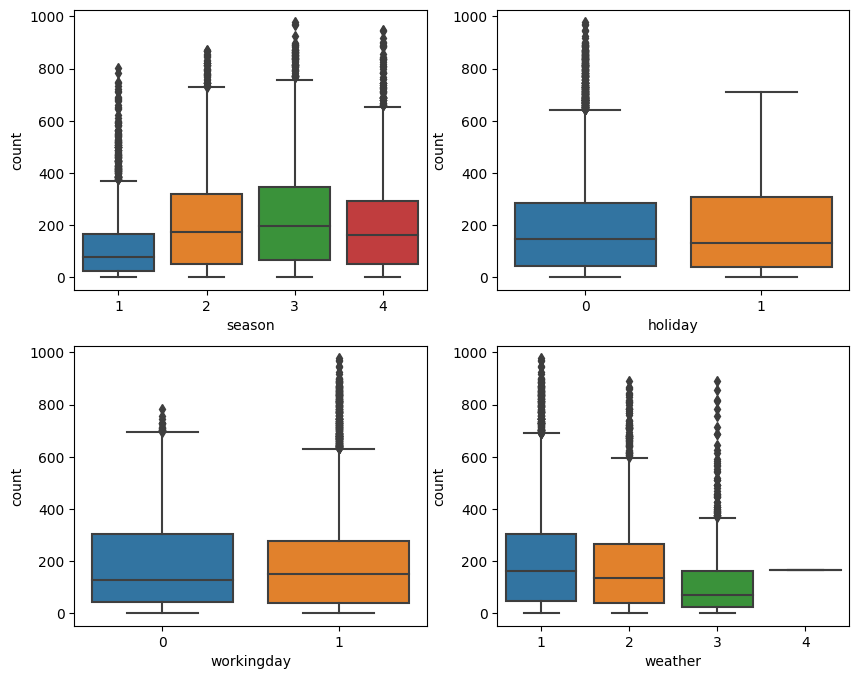

In [74]:
#1. Bi-Variate Analysis


cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
  df[col] = df[col].astype('object')

# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
index = 0
for row in range(2):
  for col in range(2):
    sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row,col])
    index += 1
plt.show()


1. In summer(season 2) and fall(season 3) seasons more bikes are rented as compared to other seasons.


2. Whenever its a holiday more bikes are rented.

3. More bike rented on non working(0) day

In [16]:

#2: Hypothesis Testing:

"""
 Chi-square test to check if Weather is dependent on the season

Null Hypothesis (H0): Weather is independent of the season
Alternate Hypothesis (H1): Weather is not independent of the season
Significance level (alpha): 0.05
"""

data_table=pd.crosstab(df['season'],df["weather"])
data_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [35]:
observed_value=[[1759,715,211],[1801,708,224],[1930,604,199],[1702,807,225]]

In [36]:
chi_stat,p_value,dof,expected_frequency=chi2_contingency(observed_value)
print("chi_stat :",chi_stat)
print("p_value :",p_value)
print("dof :",dof)
print("expected_frequency :",expected_frequency)

chi_stat : 46.10145731073249
p_value : 2.8260014509929343e-08
dof : 6
expected_frequency : [[1774.04869086  699.06201194  211.8892972 ]
 [1805.76352779  711.55920992  215.67726229]
 [1805.76352779  711.55920992  215.67726229]
 [1806.42425356  711.81956821  215.75617823]]


In [39]:
alpha=0.05
if p_value<alpha:
  print("Reject Ho")
  print("Interpretation : Weather and season are associated")
else:
  print("failed to reject Ho")

Reject Ho
Interpretation : Weather and season are associated


In [18]:
"""

2- Sample T-Test to check if Working Day has an effect on the number of electric
cycles rented :
mu1--> mean of non - working day
mu2--> mean of working day
Null Hypothesis: Working day has no effect on the number of cycles being rented.--> mu2<=mu1
Alternate Hypothesis: Working day has effect on the number of cycles being-->mu2>mu1
rented.
Significance level (alpha): 0.05
We will use the 1-Sample T-Test to test the hypothess defined above
"""
workink_day_count


,count
workingday,
0,3474
1,7412


<Axes: xlabel='workingday', ylabel='count'>

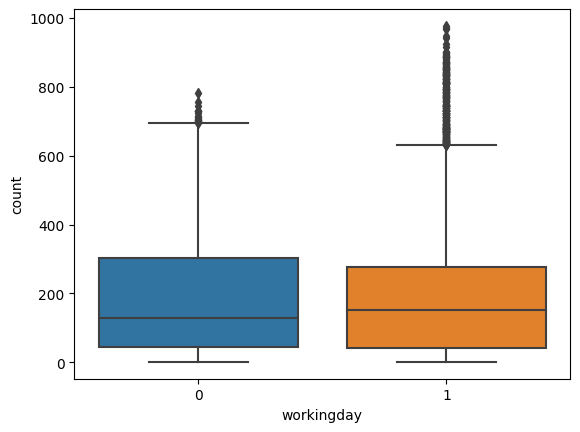

In [20]:
# visualizing the data first after that we will do hypothesis testing to prove statistically significant
sns.boxplot(x='workingday',y="count",data=df)

In [40]:
non_working_day = df[df['workingday']==0]['count'].sample(3474)


In [41]:
working_day= df[df['workingday']==1]['count'].sample(3474)


In [28]:
t_stat,p_value=ttest_ind(working_day,non_working_day,equal_var=False,alternative="greater")
print("t_stat : ",t_stat)
print("p_value : ",p_value)
alpha= 0.05
if p_value < alpha :
 print("Reject Ho")
else :
 print("Fail to Reject Ho")
 print("Interpretation : Since pvalue is greater than 0.05 so we failed to  reject the Null hypothesis. We don't \nhave the sufficient evidence to say that working day \n has effect on the number of cycles being rented")

t_stat :  0.4721110011972705
p_value :  0.3184312192961206
Fail to Reject Ho
Interpretation : Since pvalue is greater than 0.05 so we failed to  reject the Null hypothesis. We don't 
have the sufficient evidence to say that working day 
 has effect on the number of cycles being rented


In [ ]:
"""
3: -ANNOVA to check if No. of cycles rented is similar or different in
different 1. weather 2. Season


"""

In [ ]:
# Weather Check
"""
Null Hypothesis: Number of cycles rented is similar in different weather --> mean of all the weather are same
Alternate Hypothesis: Number of cycles rented is  different in weather --> mean of all the weather are diifferent
Significance level (alpha): 0.05

In [34]:
w1=df[df['weather']==1]['count'].sample(850)
w2=df[df['weather']==2]['count'].sample(850)
w3=df[df['weather']==3]['count'].sample(850)

# we will not consider weather 4 as it is outlier

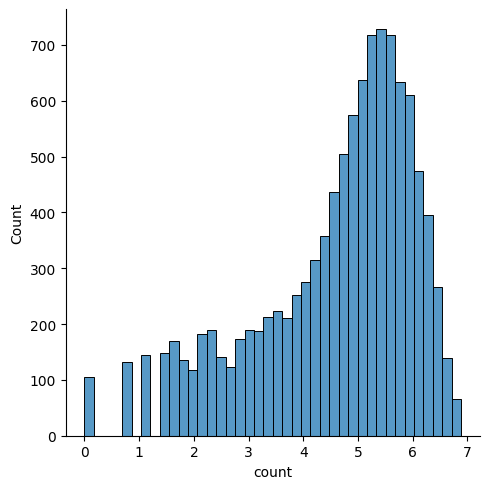

In [43]:
# ANOVA Test

# we wiil check the assumptiom

#1 Normality

sns.displot(np.log(df['count']))



In [53]:
# Now we will check if w1,w2,w3 has equal variance or not

# we can do groupby and describe
# or we can do levenes test

df.groupby(['weather'])['count'].describe()



,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [52]:
# 2 variance check
print(w1.var(),w2.var(),w3.var())

34874.49498233215 28713.657120487773 19305.95310884778


In [62]:
#Levene's Test

#Ho:all the count variane are equal
#Ha:atleast one variance is different

stat,p_value=levene(w1,w2,w3)
if p_value<0.05:
  print("Reject Ho")
  print("atleast one variance is different")
else:
  print("Failed to reject Ho")
  print("all the count variane are equal")

Reject Ho
atleast one variance is different


In [63]:
#now we will do kruskal test
stat,p_value=kruskal(w1,w2,w3)
print("p_value:",p_value)
if p_value<0.05:
  print("Reject Ho")
  print("Weather has effect on rented cycle")
else:
  print("Failed to reject Ho")
  print("Weather has not effect")

p_value: 9.136763731489565e-24
Reject Ho
Weather has effect on rented cycle


In [ ]:
# Season Check
"""
Null Hypothesis: Number of cycles rented is similar in different weather --> mean of all the weather are same
Alternate Hypothesis: Number of cycles rented is  different in weather --> mean of all the weather are diifferent
Significance level (alpha): 0.05

"""

In [59]:
df.groupby(['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [61]:
# We will do kruskal test as count is not normally distibuted
s1=df[df['season']==1]['count'].sample(850)
s2=df[df['season']==2]['count'].sample(850)
s3=df[df['season']==3]['count'].sample(850)
s4=df[df['season']==4]['count'].sample(850)

stat,p_value=kruskal(s1,s2,s3,s4)
print("p_value:" ,p_value)
if p_value<0.05:
  print("Reject Ho")
  print("season has effect on rented cycle")
else:
  print("Failed to reject Ho")
  print("season has not effect")

p_value: 1.5440589696519812e-47
Reject Ho
season has effect on rented cycle


Insights
1.In summer and fall seasons more bikes are rented as compared to other seasons.
2.Whenever its a holiday more bikes are rented.
3. It is also clear from the workingday also that whenever day is holiday or weekend,
slightly more bikes were rented.
4.Whenever there is rain, thunderstorm, snow or fog, there were less bikes were
rented.
 Whenever the humidity is less than 20, number of bikes rented is very very low.
5. Whenever the temperature is less than 10, number of bikes rented is less.
6.Whenever the windspeed is greater than 35, number of bikes rented is less.


Recommendations
1. In summer and fall seasons the company should have more bikes in stock to be
rented. Because the demand in these seasons is higher as compared to other
seasons.
2.With a significance level of 0.05, workingday has no effect on the number of bikes
being rented.Q
3.In very low humid days, company should have less bikes in the stock to be rented.
4.Whenever temperature is less than 10 or in very cold days, company should have
less bikes.
5.Whenever the windspeed is greater than 35 or in thunderstorms, company should
have less bikes in stock to be rented.